In [1]:
import numpy as np
import pandas as pd   
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Ecommerce dataset.csv", encoding= 'unicode_escape')

## EXPLORATORY DATA ANALYSIS

In [3]:
# observation of the shape.

df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Observation

- The median quantity bought is 3 at 2.08$ unitprice.
- there are negative values for min unit price and quantity

In [6]:
df.describe(include="O")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [7]:
#checking for missing values

df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

#### observation

- customer ID has 24% missing values and description has 0.27% missing values

In [8]:
# checking the negative unitprice & Quantity

df = df.loc[df['UnitPrice'] > 0]

In [9]:
df = df[(~df['InvoiceNo'].str.startswith('C'))]

In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [11]:
df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.942275
Country         0.000000
dtype: float64

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## 1. Analyze revenues from each country and quantity of products sold.

In [13]:
#Calculating total sold

df['Totalsold'] = df['Quantity'] * df['UnitPrice']

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsold
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [15]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [16]:
df.groupby(['Country'])[['Totalsold', 'Quantity']].sum()

,Totalsold,Quantity
Country,,
Australia,138521.310,83901
Austria,10198.680,4881
Bahrain,754.140,314
Belgium,41196.340,23237
Brazil,1143.600,356
Canada,3666.380,2763
Channel Islands,20450.440,9491
Cyprus,13590.380,6361
Czech Republic,826.740,671


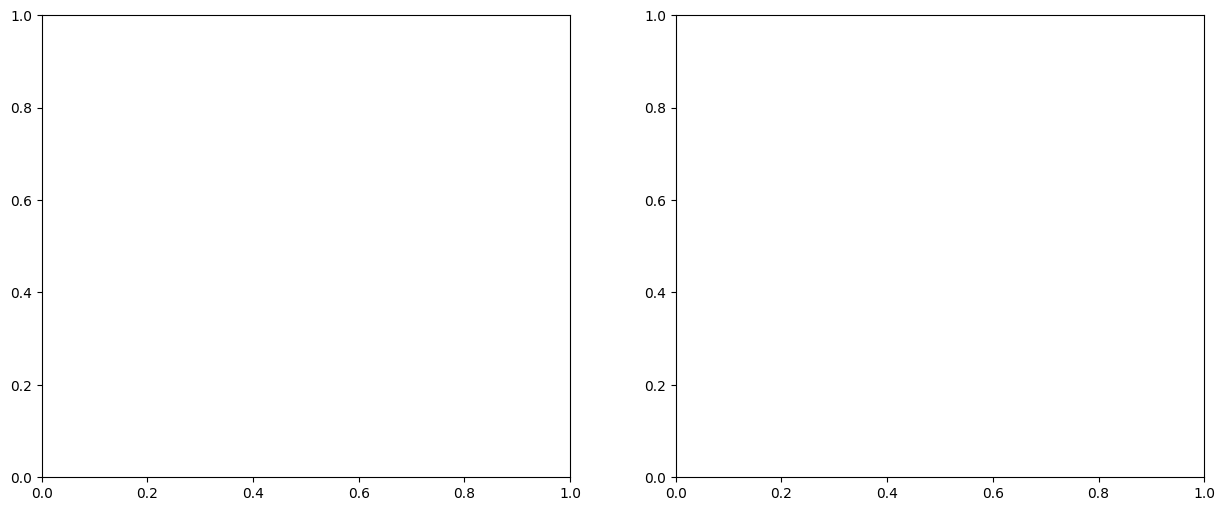

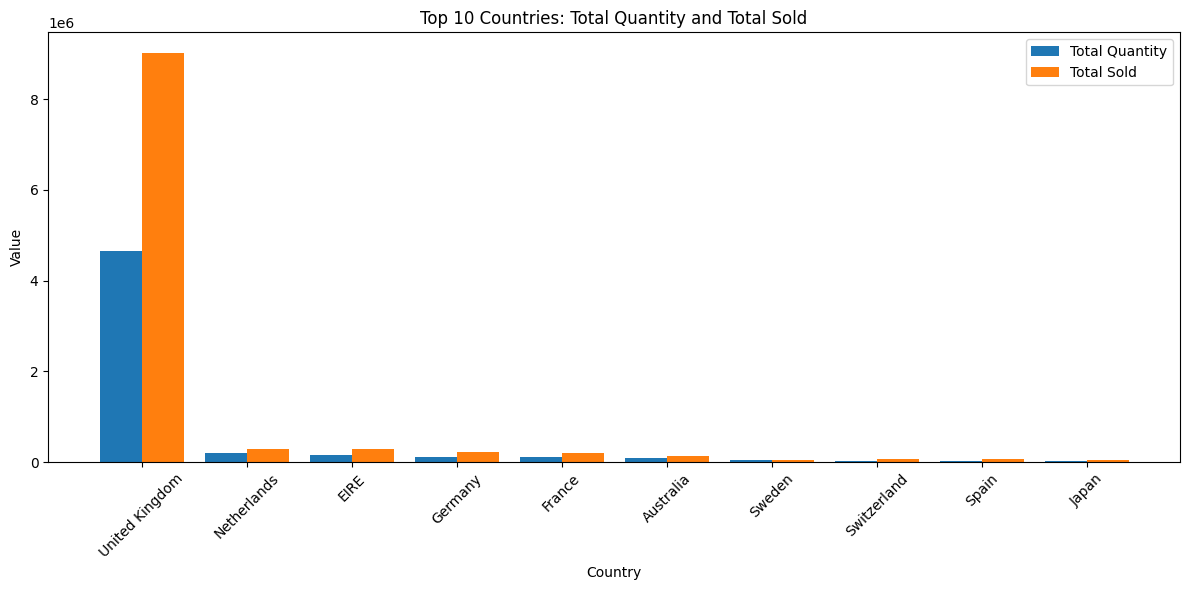

In [17]:
#Plot sidebyside column chart

df = pd.DataFrame(df)

#Group data by country and calculate total quantity and total sold
grouped = df.groupby('Country').agg({'Quantity': 'sum', 'Totalsold': 'sum'}).reset_index()

#Sort by total quantity and select top 10 countries
top_countries = grouped.nlargest(10, 'Quantity')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create 1 row, 2 columns of subplots

#Create a side-by-side column chart
plt.figure(figsize=(12, 6))

bar_width = 0.4
index = range(len(top_countries))

plt.bar(index, top_countries['Quantity'], width=bar_width, label='Total Quantity')
plt.bar([i + bar_width for i in index], top_countries['Totalsold'], width=bar_width, label='Total Sold')

plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Top 10 Countries: Total Quantity and Total Sold')
plt.xticks([i + bar_width/2 for i in index], top_countries['Country'])
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


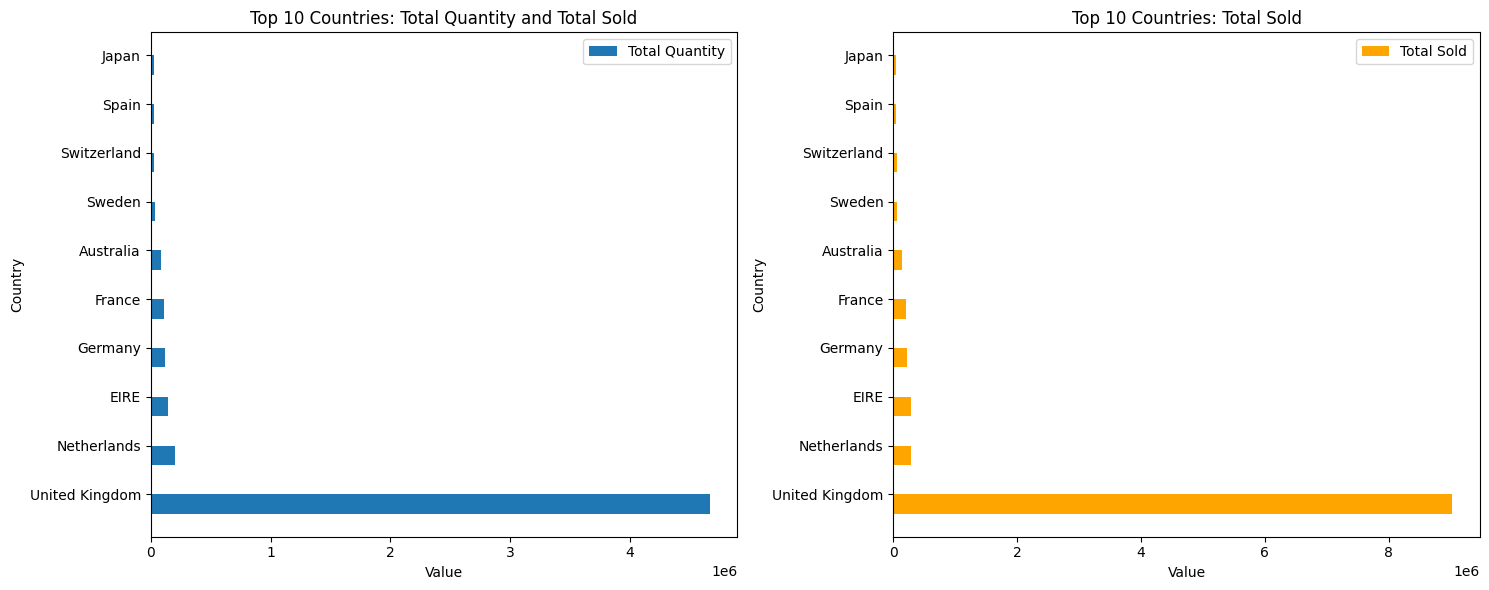

In [18]:
df = pd.DataFrame(df)

#Group data by country and calculate total quantity and total sold
grouped = df.groupby('Country').agg({'Quantity': 'sum', 'Totalsold': 'sum'}).reset_index()

#Sort by total quantity and select top 10 countries
top_countries = grouped.nlargest(10, 'Quantity')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create 1 row, 2 columns of subplots

#Plot the first horizontal bar chart
ax1 = axes[0]
bar_width = 0.4
index = range(len(top_countries))
ax1.barh(index, top_countries['Quantity'], height=bar_width, label='Total Quantity')
ax1.set_xlabel('Value')
ax1.set_ylabel('Country')
ax1.set_title('Top 10 Countries: Total Quantity and Total Sold')
ax1.set_yticks([i + 0.5 * bar_width for i in index])
ax1.set_yticklabels(top_countries['Country'])
ax1.legend()

# Plot the second horizontal bar chart
ax2 = axes[1]
# Replace 'AnotherValue' with the appropriate column name from your DataFrame
# Here, we're using the 'Totalsold' column for the second plot
ax2.barh(df.groupby(['Country'])['Totalsold'].sum().sort_values(ascending=False).head(10).index, df.groupby(['Country'])['Totalsold'].sum().sort_values(ascending=False).head(10).values, height=bar_width, color='orange', label='Total Sold')
ax2.set_xlabel('Value')
ax2.set_ylabel('Country')
ax2.set_title('Top 10 Countries: Total Sold')
ax2.set_yticks([i + 0.5 * bar_width for i in index])
ax2.set_yticklabels(top_countries['Country'])
ax2.legend()

plt.tight_layout()
plt.show()

In [19]:
df.groupby(['Country'])['Totalsold'].sum().sort_values(ascending=False).head(10).values

array([9025222.084,  285446.34 ,  283453.96 ,  228867.14 ,  209715.11 ,
        138521.31 ,   61577.11 ,   57089.9  ,   41196.34 ,   38378.33 ])

In [20]:
df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    4662390
Netherlands        200361
EIRE               147173
Germany            119261
France             112103
Australia           83901
Sweden              36083
Switzerland         30629
Spain               27940
Japan               26016
Name: Quantity, dtype: int64

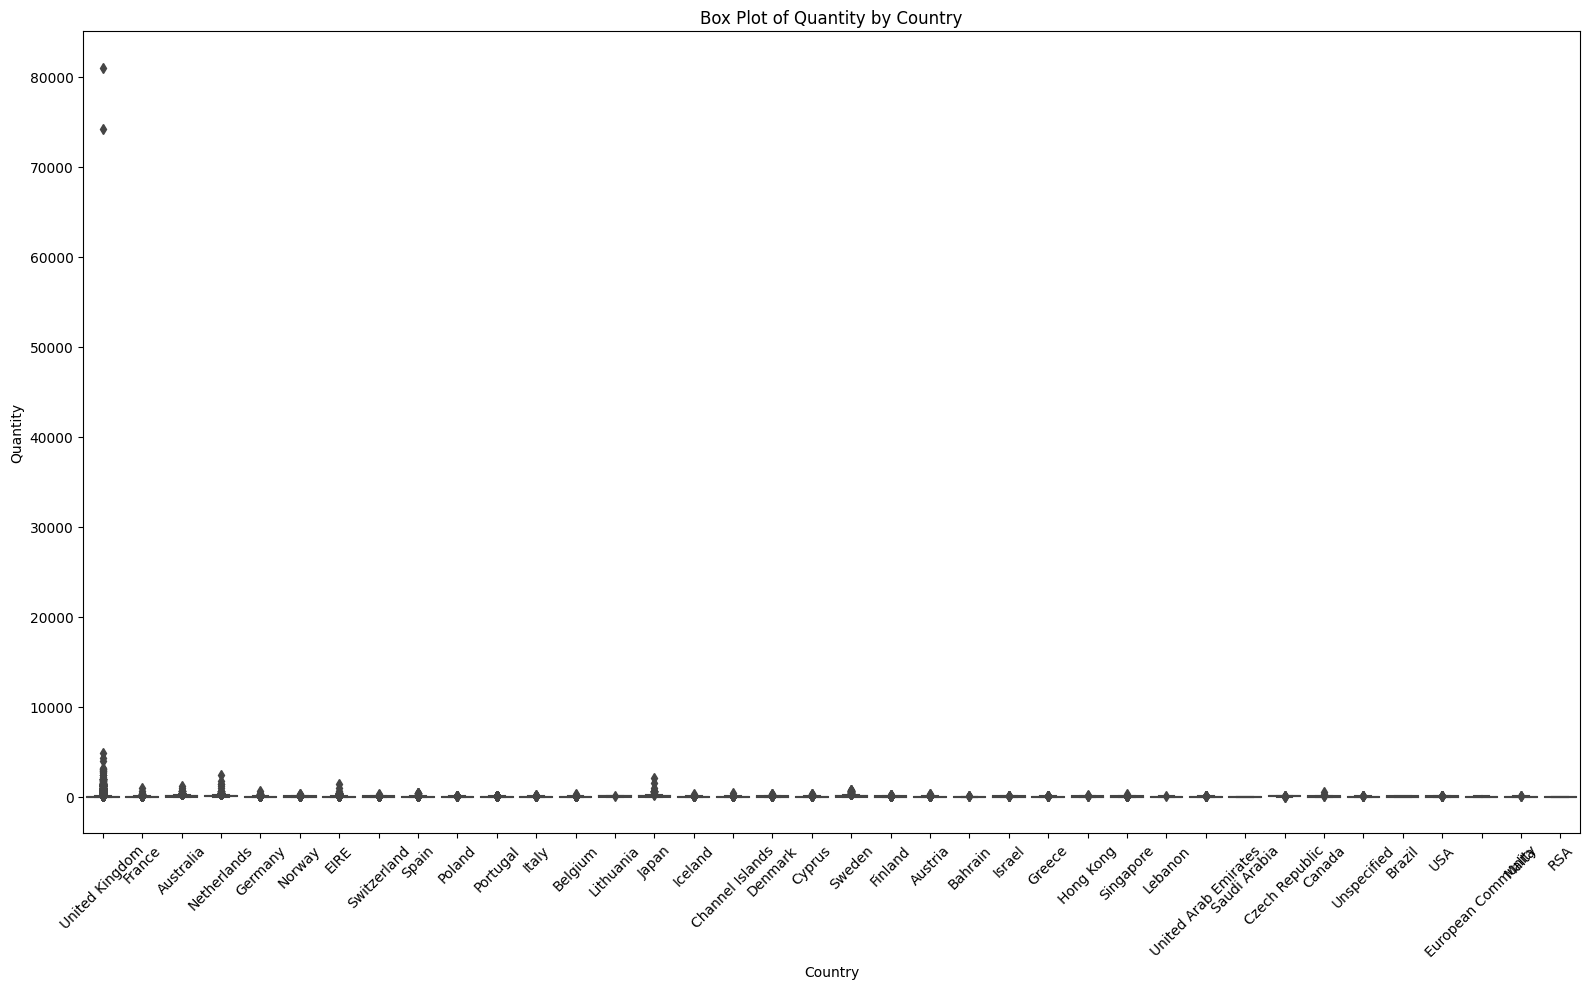

In [21]:
# Box plot for quantity accross the different countries

plt.figure(figsize=(16, 10))
sns.boxplot(x='Country', y='Quantity', data=df)
plt.title('Box Plot of Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Highlight the TOP 10 highest buying customers and their originating countries.

In [22]:
df.groupby(['CustomerID'])[['Totalsold', 'Quantity', 'InvoiceNo']].agg({'Totalsold': 'sum', 'Quantity': 'mean', 'InvoiceNo' : 'nunique'})

,Totalsold,Quantity,InvoiceNo
CustomerID,,,
12346.0,77183.60,74215.000000,1
12347.0,4310.00,13.505495,7
12348.0,1797.24,75.516129,4
12349.0,1757.55,8.643836,1
12350.0,334.40,11.588235,1
...,...,...,...
18280.0,180.60,4.500000,1
18281.0,80.82,7.714286,1
18282.0,178.05,8.583333,2


<Axes: ylabel='CustomerID'>

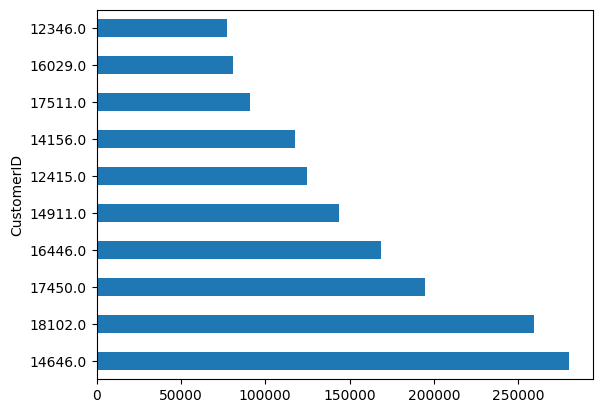

In [23]:
total_10_customer_sales = df.groupby(['CustomerID'])['Totalsold'].sum().sort_values(ascending=False).head(10)
total_10_customer_sales.plot(kind = 'barh')


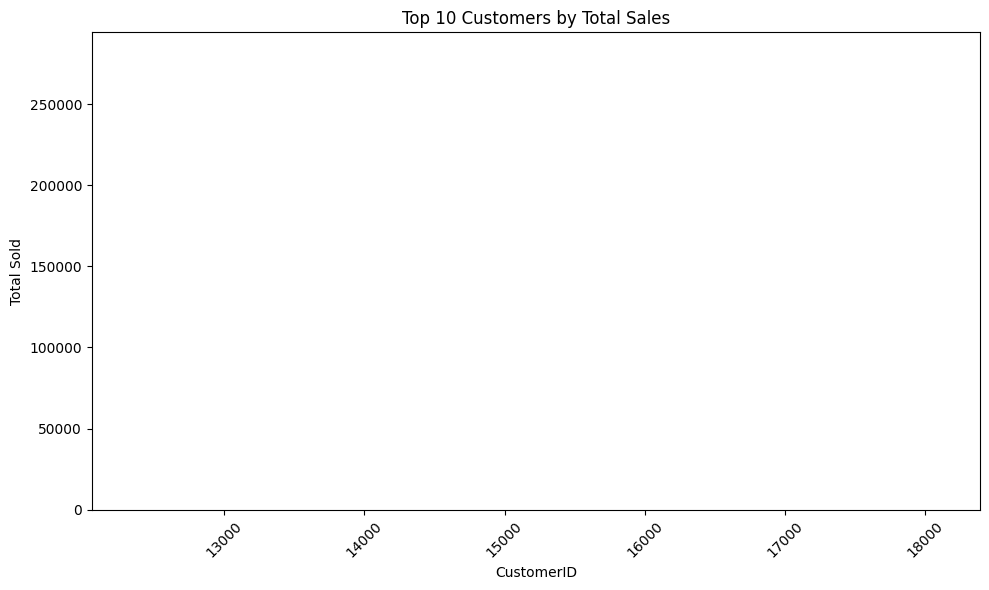

In [24]:
#plot visuals

plt.figure(figsize=(10, 6))
plt.bar(total_10_customer_sales.index, total_10_customer_sales.values)
plt.xlabel('CustomerID')
plt.ylabel('Total Sold')
plt.title('Top 10 Customers by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
top_10_Quantitybought = df.groupby(['CustomerID'])['Quantity'].mean().sort_values(ascending=False).head(10)
top_10_Quantitybought

CustomerID
12346.0    74215.0
16446.0    26999.0
13135.0     4300.0
16754.0     2140.0
16308.0     2000.0
18087.0     1953.5
15749.0     1802.8
14609.0     1756.5
15118.0     1440.0
15195.0     1404.0
Name: Quantity, dtype: float64

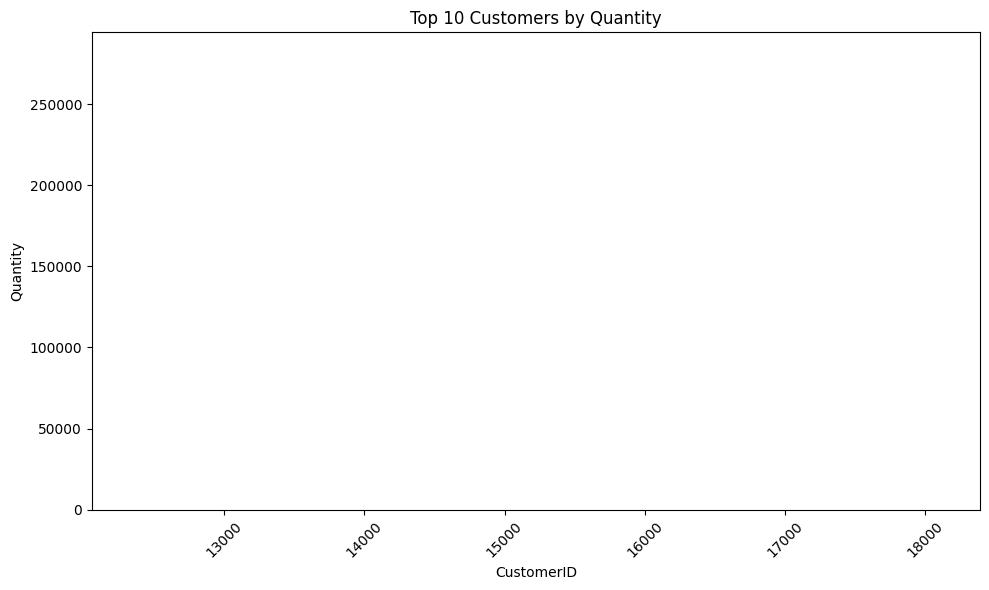

In [26]:
#plot visuals

plt.figure(figsize=(10, 6))
plt.bar(total_10_customer_sales.index, total_10_customer_sales.values,)
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.title('Top 10 Customers by Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
top_10_InvoiceNo = df.groupby(['CustomerID'])['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
top_10_InvoiceNo

CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     73
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

In [28]:
#plot visuals

## countries

In [29]:
#Top customers

top_customers = list(set(list(total_10_customer_sales.index) + list(top_10_Quantitybought.index) + list(top_10_InvoiceNo.index)))
top_customers

[15749.0,
 15118.0,
 14606.0,
 14609.0,
 16029.0,
 13089.0,
 18087.0,
 17450.0,
 12971.0,
 17841.0,
 16308.0,
 18102.0,
 14646.0,
 12346.0,
 16446.0,
 14911.0,
 14156.0,
 12748.0,
 13135.0,
 15311.0,
 15195.0,
 13408.0,
 17511.0,
 16754.0,
 12415.0]

In [30]:
country_customer_counts = df[df['CustomerID'].isin(top_customers)].groupby(['Country']).CustomerID.nunique()
country_customer_counts

Country
Australia          1
EIRE               2
Netherlands        1
United Kingdom    21
Name: CustomerID, dtype: int64

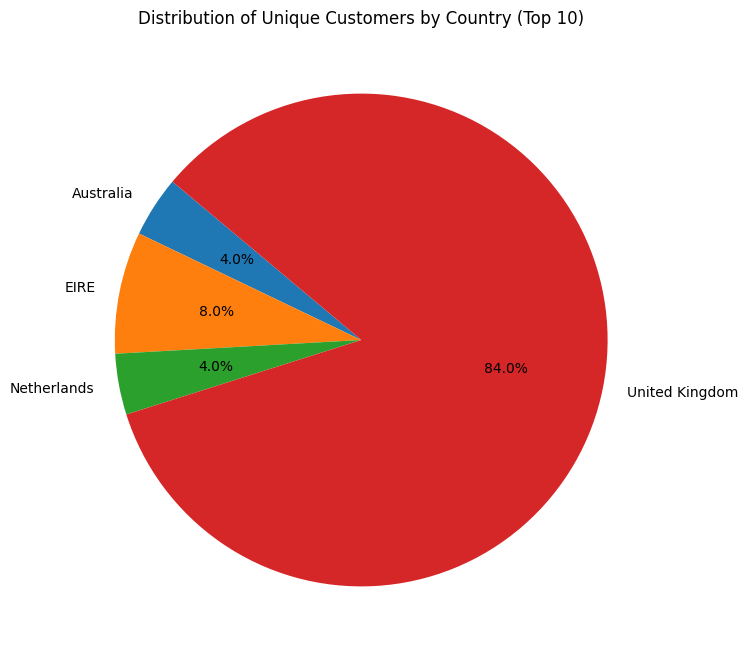

In [31]:
#PLOT VISUALS PIECHART

plt.figure(figsize=(8, 8))
plt.pie(country_customer_counts, labels=country_customer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Customers by Country (Top 10)')
plt.show()

## 3. Explore products sold, associated profits, and sales quantities.

In [32]:
df['Description'].nunique()

4026

In [33]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'LETTER "U" BLING KEY RING',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [34]:
total_quantity_sold = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).head(10)

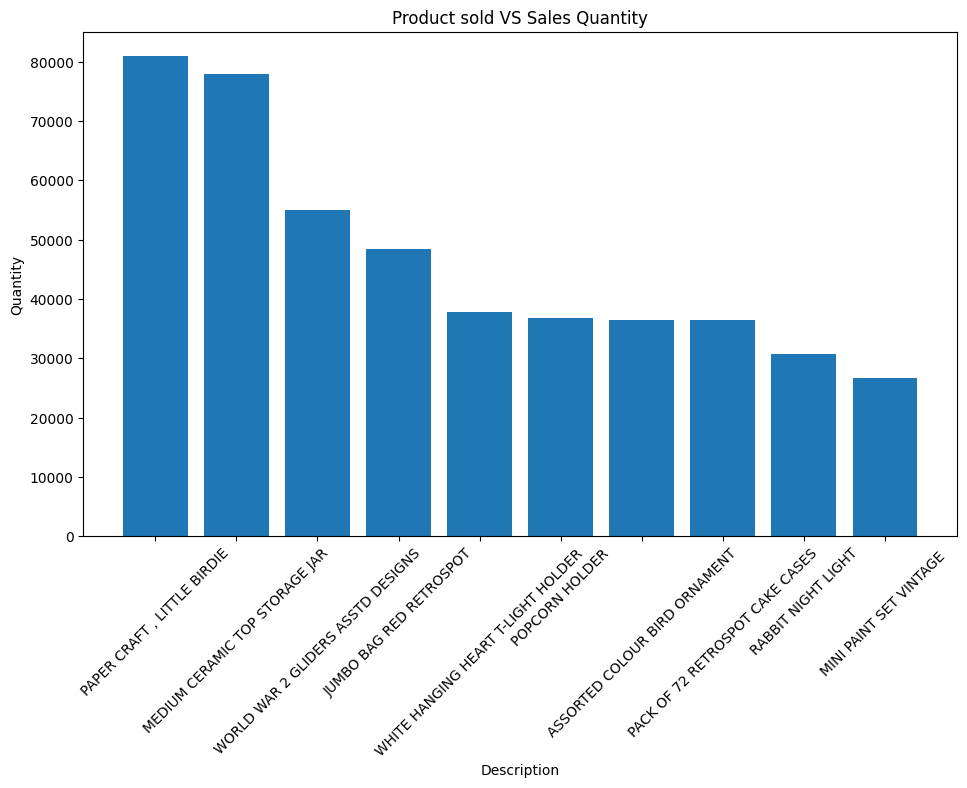

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(total_quantity_sold.index, total_quantity_sold.values,)
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.title('Product sold VS Sales Quantity')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## Identify the top products in stock across different locations.

In [36]:
top_products_accross_countries = df.groupby(['Description'])[['Country', 'Quantity']].sum().sort_values(by='Quantity',ascending=False).head(10)

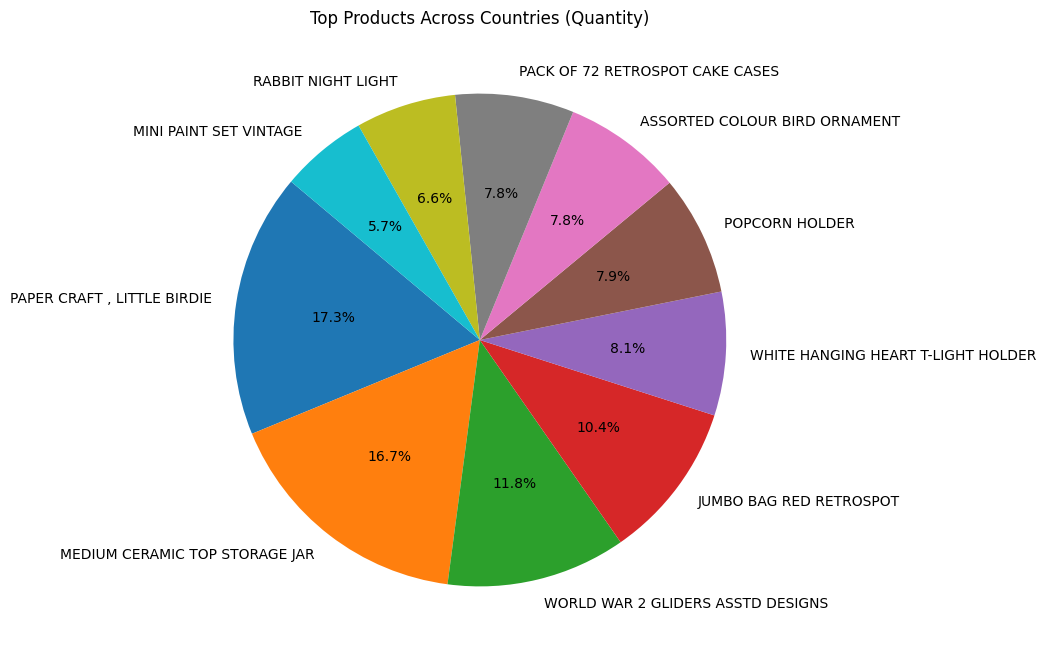

In [37]:
#plot visuals

plt.figure(figsize=(8, 8))
plt.pie(top_products_accross_countries['Quantity'], labels=top_products_accross_countries.index, autopct='%.1f%%', startangle=140)
plt.title('Top Products Across Countries (Quantity)')
plt.show()